In [5]:
import pandas as pd
# import ast
# import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import re
# import random
# import string
%matplotlib inline


# something a warning told me to do?
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', 150)


print("done")

done


In [6]:
import import_func as imp
import tags_work as tgs
import desc_vis as vis
import classifier_func as cls
import classifier_help as clh

def output_plot(outfile):
    fig1 = plt.gcf()
    plt.show()
    plt.draw()
    fig1.savefig(outfile, dpi=100, bbox_inches='tight')

In [4]:
full_advice = "../data/genre_advice_full_021520.jl"
full_filename = "../data/by_article_fulltext_020920.jl"

# get full text dataset as a df
advice_df = imp.init_df(full_advice, "full", genre="advice", categories="all")
advice_df = advice_df[advice_df["year"]<2020]
full_df = imp.init_df(full_filename, "full", categories="limited")
full_df = full_df[full_df["year"]<2020]

# full_df["probnews"] = np.where(
#         (full_df["advice"] == "no") & (full_df["one_time"] == "no"),
#         "yes",
#         "no",
#     )

# advice_tag_df = full_df[full_df.advice=="yes"]
# wl_tag_df = full_df[full_df.one_time=="yes"]
# news_tag_df = full_df[full_df.probnews=="yes"]

categories = [
        # "ctscinet", # no defined genre
        "career_related_policy",
        "working_life",
        "career_profiles",
        # "life_and_career_balance",# no defined genre
        # "myscinet", # no defined genre
        # "issues_and_perspectives", # too much overlap with advice, no defined genre
        "advice"
        ]

full_df = full_df.drop(
    [
        "date",
        "time",
        "date_seq",
        "column1",
        "column2",
        "one_time",
        "working_life",
        "career_related_policy",
        "career_profiles",
        "bio",
    ],
    axis=1,
)

print("done")

done


In [30]:
full_df["category"].value_counts()

uncategorized            3316
advice                   2304
career_profiles           281
working_life              145
career_related_policy      66
Name: category, dtype: int64

In [31]:
frequency_filename = "../data/frequency_wordlex.csv"

frequency = pd.read_csv(frequency_filename)
# frequency = pd.DataFrame(frequency)
total = sum(frequency.FREQcount)
print(total)

frequency["proportion"] = frequency["FREQcount"]/total

frequency.head()

49719560


,still,FREQcount,CDcount,FREQlow,Cdlow,SUBTLWF,Lg10WF,SUBTLCD,Lg10CD,proportion
0,the,1501908,8388,1339811,8388,29449.18,6.1766,100.00,3.9237,0.030208
1,to,1156570,8383,1138435,8380,22677.84,6.0632,99.94,3.9235,0.023262
2,a,1041179,8382,976941,8380,20415.27,6.0175,99.93,3.9234,0.020941
3,you,2134713,8381,1595028,8376,41857.12,6.3293,99.92,3.9233,0.042935
4,and,682780,8379,515365,8374,13387.84,5.8343,99.89,3.9232,0.013733


In [32]:
freq_first = 0
freq_second = 0

first_list = ["I", "im", "ive", "id", "my", "me", "myself"]
second_list = ["you", "youre", "youve", "youd", "your", "yourself"]

new_first_list = []
new_second_list = []

count=0

for word in first_list:
    if len(frequency.loc[frequency.still == word])==0:
        print(word)
        continue
    else:
        count+=1
        freq = frequency.loc[frequency.still == word, "FREQcount"].item()
        freq_first+=freq
        new_first_list.append(word)

count=0
for word in second_list:
    if len(frequency.loc[frequency.still == word])==0:
        print(word)
        continue
    else:
        count+=1
        freq = frequency.loc[frequency.still == word, "FREQcount"].item()
        freq_second+=freq
        new_second_list.append(word)

print(len(new_first_list)/len(first_list))
print(len(new_second_list)/len(second_list))

# first_list = new_first_list
# second_list = new_second_list

exp_first = freq_first/total
exp_second = freq_second/total

print(exp_first)
print(exp_second)

id
youre
youve
0.8571428571428571
0.6666666666666666
0.057774787226596534
0.04999209566617243


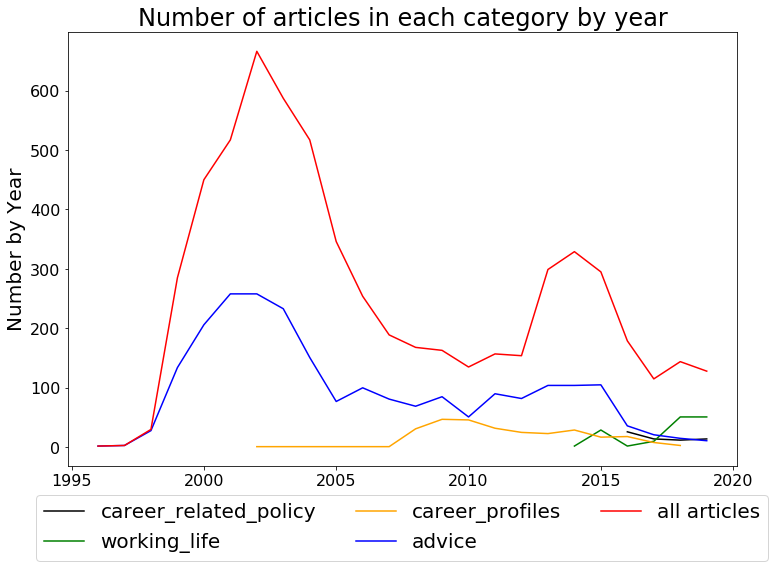

In [34]:
plt.figure(figsize=(12, 8))

full_vis = vis.prep_per(full_df, group_by="year")
# advice_vis = vis.prep_per(advice_df, group_by="year")

colors = ["black","green","orange","blue","purple","yellow"]
dfs = []
count=0

for cat in categories:
    cat_df = full_df[full_df["category"] == cat]
    dfs.append(cat_df)
    cat_vis = vis.prep_per(cat_df, group_by = "year")
    # print(cat_vis.head())
    sns.lineplot(x = "year", y = "n", color = colors[count], legend="full", label=cat,data = cat_vis)
    count+=1

sns.lineplot(x = "year", y = "n", color = "red", legend="full", label="all articles",data = full_vis)

plt.title("Number of articles in each category by year", fontsize=24)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.24), ncol=3, fontsize=20)
plt.xlabel('')
plt.ylabel('Number by Year', fontsize=20)
plt.tick_params(labelsize=16)

plt.savefig("../figs/article_types_expanded.png", bbox_inches="tight")

# sns.lineplot(x = "year", y = "n", color = "blue", data=advice_vis)
# sns.lineplot(x = "year", y = "n", color = "red", data=full_vis)

# plt.savefig("../figs/advice_section.png")

In [47]:
categories = [
        "career_related_policy",
        "working_life",
        "career_profiles",
        "advice",
        "uncategorized"
        ]

dfs = []
for cat in categories:
    dfs.append(full_df[full_df.category == cat])

policy_df = dfs[0]
wl_df = dfs[1]
profile_df = dfs[2]
advice_df = dfs[3]
uncategorized_df = dfs[4]

Text(0.5, 1.0, 'advice')

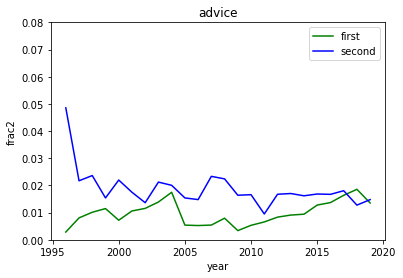

In [36]:
# just using the advice df only 

counts_df = clh.pronouns(advice_df)

counts_df["frac1"] = counts_df["first"]/counts_df["wc"]
counts_df["frac2"] = counts_df["second"]/counts_df["wc"]

advice_counts_plot_df = counts_df.groupby("year").mean()

advice_counts_plot_df = advice_counts_plot_df.reset_index()

# counts_plot_df.head()

sns.lineplot(x = "year", y = "frac1", color = "green", label="first", data=advice_counts_plot_df)
sns.lineplot(x = "year", y = "frac2", color = "blue", label="second", data=advice_counts_plot_df)
plt.title("advice person proportions")
plt.ylim(0,0.08)
plt.title("advice")

# plt.savefig("../figs/person_advice.png")

In [24]:
# counts_df = clh.pronouns(advice_df)

# counts_df = counts_df.groupby("year").sum()

# counts_df["inc1"] = counts_df["first"]*1000/counts_df["wc"]
# counts_df["inc2"] = counts_df["second"]*1000/counts_df["wc"]

# counts_df = counts_df.reset_index()


# sns.lineplot(x = "year", y = "inc1", color = "green", label="first", data=counts_df)
# sns.lineplot(x = "year", y = "inc2", color = "blue", label="second", data=counts_df)
# plt.title("advice person proportions")
# # plt.ylim(0,0.08)
# plt.title("advice")

In [25]:
# # just using the advice tagged articles in the full dataset

# counts_df = clh.pronouns(policy_df)

# # print(counts_df.sort_values(by="year").tail())
# counts_df["frac1"] = counts_df["first"]/counts_df["wc"]
# counts_df["frac2"] = counts_df["second"]/counts_df["wc"]

# advice_tag_counts_plot_df = counts_df.groupby("year").mean()

# advice_tag_plot_df = advice_tag_counts_plot_df.reset_index()

# sns.lineplot(x = "year", y = "frac1", color = "lightblue", label="first", data=advice_tag_plot_df)
# sns.lineplot(x = "year", y = "frac2", color = "blue", label="second", data=advice_tag_plot_df)
# plt.title("career related policy person proportions")
# plt.ylim(0,0.08)

# print(max(advice_tag_plot_df["frac1"]))

# plt.savefig("../figs/person_policy.png")

In [26]:
# counts_df = clh.pronouns(profile_df, q_replace=False)

# counts_df["frac1"] = counts_df["first"]/counts_df["wc"]
# counts_df["frac2"] = counts_df["second"]/counts_df["wc"]

# news_counts_plot_df = counts_df.groupby("month_seq").mean()

# news_counts_plot_df = news_counts_plot_df.reset_index()

# sns.lineplot(x = "month_seq", y = "frac1", color = "orange", label="first", data=news_counts_plot_df)
# sns.lineplot(x = "month_seq", y = "frac2", color = "sienna", label="second", data=news_counts_plot_df)
# plt.title("career profiles person proportions")
# plt.ylim(0,0.08)
# # plt.title("News")

# plt.savefig("../figs/person_profiles.png")


In [27]:
# counts_df = clh.pronouns(profile_df, q_replace=True)

# counts_df["frac1"] = counts_df["first"]/counts_df["wc"]
# counts_df["frac2"] = counts_df["second"]/counts_df["wc"]

# news_counts_plot_df = counts_df.groupby("year").mean()

# news_counts_plot_df = news_counts_plot_df.reset_index()

# sns.lineplot(x = "year", y = "frac1", color = "orange", label="first", data=news_counts_plot_df)
# sns.lineplot(x = "year", y = "frac2", color = "sienna", label="second", data=news_counts_plot_df)
# plt.title("career profiles person proportions")
# plt.ylim(0,0.08)
# # plt.title("News")

# plt.savefig("../figs/person_profiles.png")

In [12]:
# counts_df.sort_values(by="year")

In [28]:
# # just using the working life tag only 

# counts_df = clh.pronouns(wl_df)

# counts_df["frac1"] = counts_df["first"]/counts_df["wc"]
# counts_df["frac2"] = counts_df["second"]/counts_df["wc"]

# wl_counts_plot_df = counts_df.groupby("month_seq").mean()

# wl_counts_plot_df = wl_counts_plot_df.reset_index()

# sns.lineplot(x = "month_seq", y = "frac1", color = "yellowgreen", label="first", data=wl_counts_plot_df)
# sns.lineplot(x = "month_seq", y = "frac2", color = "darkolivegreen", label="second", data=wl_counts_plot_df)
# # plt.ylim(0,0.08)
# plt.title("Working Life")

# plt.savefig("../figs/person_WL.png")

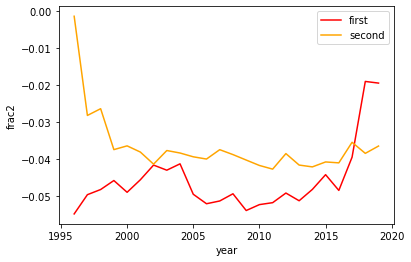

In [37]:
counts_df = clh.pronouns(full_df)

counts_df["frac1"] = counts_df["first"]/counts_df["wc"]-exp_first
counts_df["frac2"] = counts_df["second"]/counts_df["wc"]-exp_second

counts_plot_df = counts_df.groupby("year").mean()

full_counts_plot_df = counts_plot_df.reset_index()
counts_plot_df = counts_plot_df.reset_index()
counts_df.head()

sns.lineplot(x = "year", y = "frac1", color = "red", label="first", data=full_counts_plot_df)
sns.lineplot(x = "year", y = "frac2", color = "orange", label="second", data=full_counts_plot_df)

plt.savefig("../figs/person_all.png")


Text(0.5, 1.0, 'all incidence')

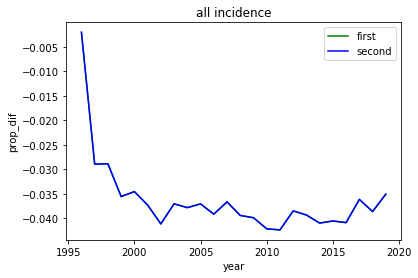

In [38]:
counts_df = clh.pronouns(full_df)

counts_df = counts_df.groupby("year").sum()

counts_df["prop_dif"] = counts_df["first"]/counts_df["wc"]-exp_first
counts_df["prop_dif"] = counts_df["second"]/counts_df["wc"]-exp_second

full_inc_df = counts_df.reset_index()


sns.lineplot(x = "year", y = "prop_dif", color = "green", label="first", data=full_inc_df)
sns.lineplot(x = "year", y = "prop_dif", color = "blue", label="second", data=full_inc_df)
plt.title("all incidence")
# plt.ylim(0,0.08)
# plt.title("advice")

In [48]:
# counts_df = clh.pronouns(full_df)

# counts_df = counts_df.groupby("month_seq").sum()

# counts_df["inc1"] = counts_df["first"]/counts_df["wc"]
# counts_df["inc2"] = counts_df["second"]/counts_df["wc"]

# full_inc_df_month = counts_df.reset_index()


# sns.lineplot(x = "year", y = "inc1", color = "green", label="first", data=full_inc_df_month)
# sns.lineplot(x = "year", y = "inc2", color = "blue", label="second", data=full_inc_df_month)
# plt.title("all incidence")
# # plt.ylim(0,0.08)
# plt.title("advice")

In [68]:
plt.figure(figsize=(12, 8))

colors = ["black","green","orange","blue","purple","yellow"]
plots = []
count=0

sns.lineplot(x = "year", y = "frac1", color = "red", label="full", linewidth=4, data=full_counts_plot_df)

for df in dfs:
    # cat_df = full_df[full_df[cat] == "yes"]
    if categories[count]=="working_life" or  categories[count] == "advice":

        # print(categories[count])
        counts_df = clh.pronouns(df)
        counts_df["frac1"] = counts_df["first"]/counts_df["wc"]-exp_first

        counts_plot_df = counts_df.groupby("year").mean()
        counts_plot_df = counts_plot_df.reset_index()

        sns.lineplot(x = "year", y = "frac1", color = colors[count], legend="full", label=categories[count], linewidth=2, data = counts_plot_df)
        # sns.lineplot(x = "year", y = "frac1", color = "red", label="first", data=full_counts_plot_df)

    count+=1

plt.axhline(y=0, color="gray")
plt.title("Average Frequency of First Person Pronouns by Year", fontsize=24)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.24), ncol=3, fontsize=20)
plt.xlabel('')
plt.ylabel('frequency compared with expected', fontsize=20)
plt.tick_params(labelsize=16)
output_plot("../figs/person_first_all_category.png")
# plt.savefig("../figs/person_first_all_category.png")

TypeError: output_plot() got an unexpected keyword argument 'bbox_inches'

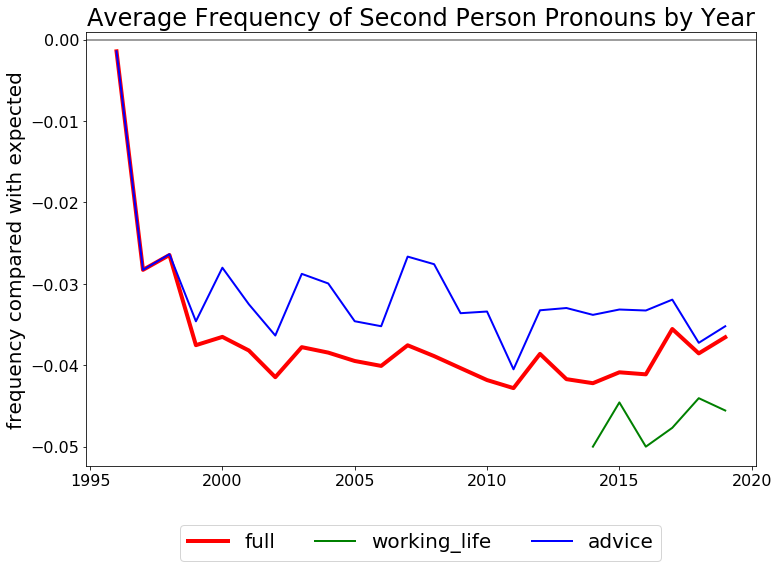

<Figure size 432x288 with 0 Axes>

In [67]:
colors = ["black","green","orange","blue","purple","yellow"]
plots = []
count=0

plt.figure(figsize=(12, 8))

sns.lineplot(x = "year", y = "frac2", color = "red", label="full", linewidth=4, data=full_counts_plot_df)

for df in dfs:
    # cat_df = full_df[full_df[cat] == "yes"]
    if categories[count]=="working_life" or  categories[count] == "advice":

        counts_df = clh.pronouns(df)
        counts_df["frac2"] = counts_df["second"]/counts_df["wc"]-exp_second
        
        counts_plot_df = counts_df.groupby("year").mean()
        counts_plot_df = counts_plot_df.reset_index()

        sns.lineplot(x = "year", y = "frac2", color = colors[count], legend="full", label=categories[count], linewidth=2, data = counts_plot_df)
        # sns.lineplot(x = "year", y = "frac1", color = "red", label="first", data=full_counts_plot_df)

    count+=1

plt.axhline(y=0, color="gray")
plt.title("Average Frequency of Second Person Pronouns by Year", fontsize=24)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.24), ncol=3, fontsize=20)
plt.xlabel('')
plt.ylabel('frequency compared with expected', fontsize=20)
plt.tick_params(labelsize=16)
output_plot("../figs/person_second_all_category.png", bbox_inches="tight")

# plt.savefig("../figs/person_second_all_category.png")

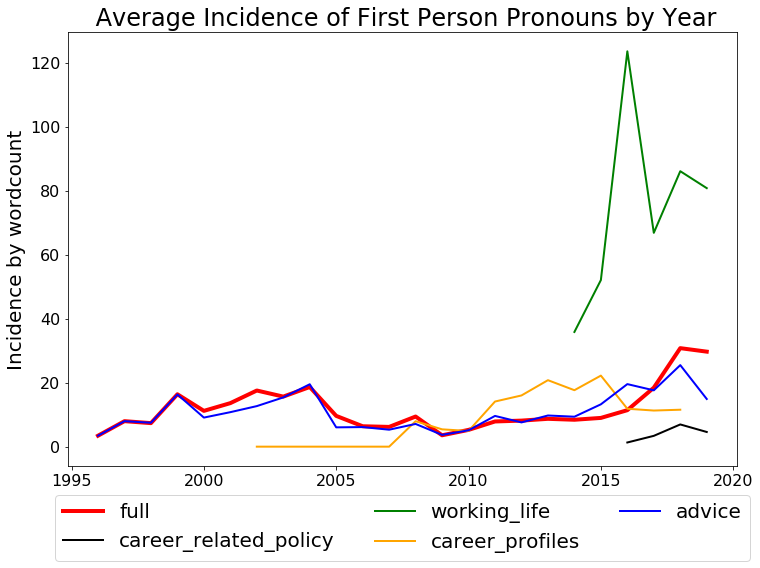

<Figure size 432x288 with 0 Axes>

In [19]:
plt.figure(figsize=(12, 8))

colors = ["black","green","orange","blue","purple","yellow"]
plots = []
count=0

sns.lineplot(x = "year", y = "inc1", color = "red", label="full", linewidth=4, data=full_inc_df)

for df in dfs:
    # cat_df = full_df[full_df[cat] == "yes"]
    counts_df = clh.pronouns(df)

    counts_df = counts_df.groupby("year").sum()
    
    counts_df["inc1"] = counts_df["first"]*1000/counts_df["wc"]
    
    counts_plot_df = counts_df.reset_index()

    sns.lineplot(x = "year", y = "inc1", color = colors[count], legend="full", label=categories[count], linewidth=2, data = counts_plot_df)
    # sns.lineplot(x = "year", y = "frac1", color = "red", label="first", data=full_counts_plot_df)

    count+=1

plt.title(" Average Incidence of First Person Pronouns by Year", fontsize=24)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.24), ncol=3, fontsize=20)
plt.xlabel('')
plt.ylabel('Incidence by wordcount', fontsize=20)
plt.tick_params(labelsize=16)
output_plot("../figs/person_first_inc_all_category.png")
# plt.savefig("../figs/person_first_all_category.png")

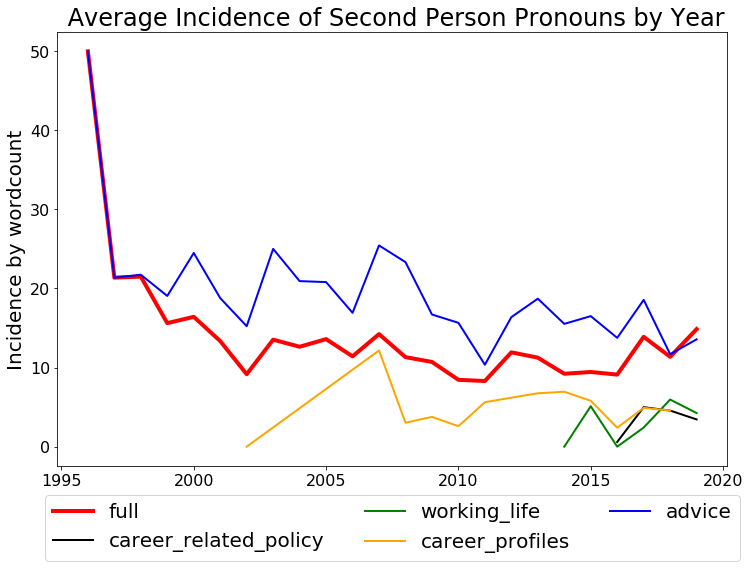

<Figure size 432x288 with 0 Axes>

In [20]:
plt.figure(figsize=(12, 8))

colors = ["black","green","orange","blue","purple","yellow"]
plots = []
count=0

sns.lineplot(x = "year", y = "inc2", color = "red", label="full", linewidth=4, data=full_inc_df)

for df in dfs:
    # cat_df = full_df[full_df[cat] == "yes"]
    counts_df = clh.pronouns(df)

    counts_df = counts_df.groupby("year").sum()
    
    counts_df["inc2"] = counts_df["second"]*1000/counts_df["wc"]
    
    counts_plot_df = counts_df.reset_index()

    sns.lineplot(x = "year", y = "inc2", color = colors[count], legend="full", label=categories[count], linewidth=2, data = counts_plot_df)
    # sns.lineplot(x = "year", y = "frac1", color = "red", label="first", data=full_counts_plot_df)

    count+=1

plt.title(" Average Incidence of Second Person Pronouns by Year", fontsize=24)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.24), ncol=3, fontsize=20)
plt.xlabel('')
plt.ylabel('Incidence by wordcount', fontsize=20)
plt.tick_params(labelsize=16)
output_plot("../figs/person_second_inc_all_category.png")
# plt.savefig("../figs/person_first_all_category.png")

In [16]:
# plt.figure(figsize=(12, 8))

# colors = ["black","green","orange","blue","purple","yellow"]
# plots = []
# count=0

# # sns.lineplot(x = "month_seq", y = "inc1", color = "red", label="full", linewidth=4, data=full_inc_df)

# for df in dfs:
#     # cat_df = full_df[full_df[cat] == "yes"]
#     counts_df = clh.pronouns(df)

#     counts_df = counts_df.groupby("month_seq").sum()
    
#     counts_df["inc1"] = counts_df["first"]*1000/counts_df["wc"]
    
#     counts_plot_df = counts_df.reset_index()
#     # print(counts_plot_df.tail())

#     counts_plot_df["inc1_rolling_mean"] = counts_plot_df.inc1.rolling(12).mean() 

#     sns.lineplot(x = "month_seq", y = "inc1_rolling_mean", color = colors[count], legend="full", label=categories[count], linewidth=2, data = counts_plot_df)
#     # sns.lineplot(x = "year", y = "frac1", color = "red", label="first", data=full_counts_plot_df)

#     count+=1

# plt.title(" Average Incidence of First Person Pronouns by Year", fontsize=24)
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.24), ncol=3, fontsize=20)
# plt.xlabel('')
# plt.ylabel('Incidence by wordcount', fontsize=20)
# plt.tick_params(labelsize=16)
# output_plot("../figs/person_first_inc_all_category.png")
# # plt.savefig("../figs/person_first_all_category.png")

In [17]:
# plt.figure(figsize=(12, 8))

# colors = ["black","green","orange","blue","purple","yellow"]
# plots = []
# count=0

# # sns.lineplot(x = "month_seq", y = "inc1", color = "red", label="full", linewidth=4, data=full_inc_df)

# for df in dfs:
#     # cat_df = full_df[full_df[cat] == "yes"]
#     counts_df = clh.pronouns(df)

#     counts_df = counts_df.groupby("month_seq").sum()
    
#     counts_df["inc2"] = counts_df["second"]*1000/counts_df["wc"]
    
#     counts_plot_df = counts_df.reset_index()
#     # print(counts_plot_df.tail())

#     counts_plot_df["inc2_rolling_mean"] = counts_plot_df.inc2.rolling(12).mean() 

#     sns.lineplot(x = "month_seq", y = "inc2_rolling_mean", color = colors[count], legend="full", label=categories[count], linewidth=2, data = counts_plot_df)
#     # sns.lineplot(x = "year", y = "frac1", color = "red", label="first", data=full_counts_plot_df)

#     count+=1

# plt.title(" Average Incidence of Second Person Pronouns by Year", fontsize=24)
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.24), ncol=3, fontsize=20)
# plt.xlabel('')
# plt.ylabel('Incidence by wordcount', fontsize=20)
# plt.tick_params(labelsize=16)
# output_plot("../figs/person_second_inc_all_category.png")
# # plt.savefig("../figs/person_first_all_category.png")

<Figure size 864x576 with 0 Axes>

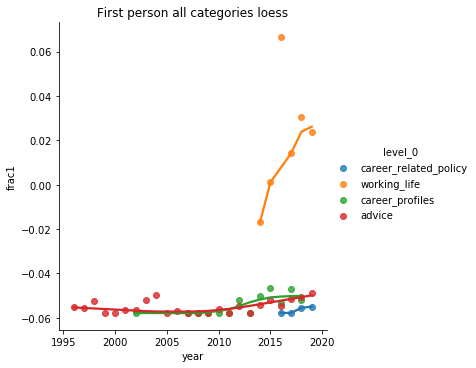

<Figure size 432x288 with 0 Axes>

In [18]:
count=0
pieces=[]

plt.figure(figsize=(12, 8))


for df in dfs:
    # cat_df = full_df[full_df[cat] == "yes"]
    counts_df = clh.pronouns(df)
    counts_df["frac1"] = counts_df["first"]/counts_df["wc"]-exp_first
    
    counts_plot_df = counts_df.groupby("year").median()
    counts_plot_df = counts_plot_df.reset_index()
    pieces.append(counts_plot_df)

    # sns.lmplot(x = "year", y = "frac1",lowess=True, data = counts_plot_df)
    # plt.title("first person "+categories[count])

    count+=1

reg = pd.concat(pieces, keys=['career_related_policy', 'working_life', 'career_profiles','advice'])
reg = reg.reset_index()
# reg
sns.lmplot(x = "year", y = "frac1",lowess=True, hue="level_0", data = reg)
plt.title("First person all categories loess")

output_plot("../figs/person_all_category_loess.png")

<Figure size 864x576 with 0 Axes>

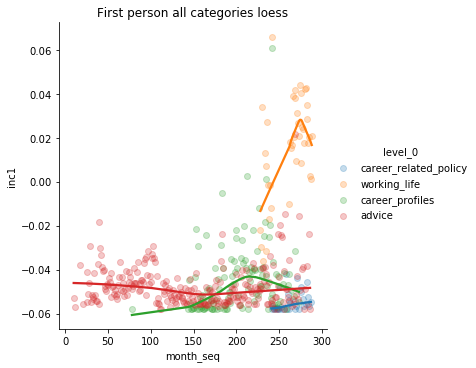

<Figure size 432x288 with 0 Axes>

In [20]:
count=0
pieces=[]

plt.figure(figsize=(12, 8))


for df in dfs:
    # cat_df = full_df[full_df[cat] == "yes"]
    counts_df = clh.pronouns(df)
    counts_df = counts_df.groupby("month_seq").sum()

    counts_df["inc1"] = counts_df["first"]/counts_df["wc"]-exp_first
    
    counts_plot_df = counts_df.reset_index()
    pieces.append(counts_plot_df)

    # sns.lmplot(x = "year", y = "frac1",lowess=True, data = counts_plot_df)
    # plt.title("first person "+categories[count])

    count+=1

reg = pd.concat(pieces, keys=['career_related_policy', 'working_life', 'career_profiles','advice'])
reg = reg.reset_index()
# reg
sns.lmplot(x = "month_seq", y = "inc1", lowess=True, hue="level_0",scatter_kws={'alpha':0.25}, data = reg)
plt.title("First person all categories loess")

output_plot("../figs/person_all_category_loess_inc_month.png")

<Figure size 864x576 with 0 Axes>

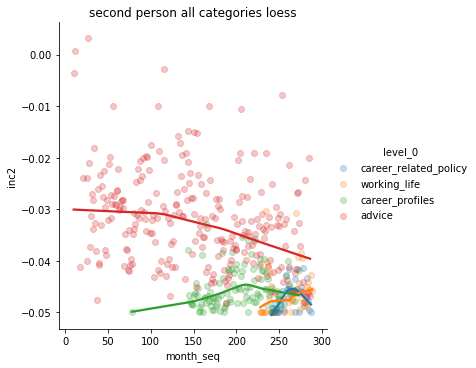

<Figure size 432x288 with 0 Axes>

In [21]:
count=0
pieces=[]

plt.figure(figsize=(12, 8))


for df in dfs:
    # cat_df = full_df[full_df[cat] == "yes"]
    counts_df = clh.pronouns(df)
    counts_df = counts_df.groupby("month_seq").sum()

    counts_df["inc2"] = counts_df["second"]/counts_df["wc"]-exp_second
    
    counts_plot_df = counts_df.reset_index()
    pieces.append(counts_plot_df)

    # sns.lmplot(x = "year", y = "frac1",lowess=True, data = counts_plot_df)
    # plt.title("first person "+categories[count])

    count+=1

reg = pd.concat(pieces, keys=['career_related_policy', 'working_life', 'career_profiles','advice'])
reg = reg.reset_index()
# reg
sns.lmplot(x = "month_seq", y = "inc2", lowess=True, hue="level_0",scatter_kws={'alpha':0.25}, data = reg)
plt.title("second person all categories loess")

output_plot("../figs/person_first_all_category_loess_inc_month.png")

<Figure size 864x576 with 0 Axes>

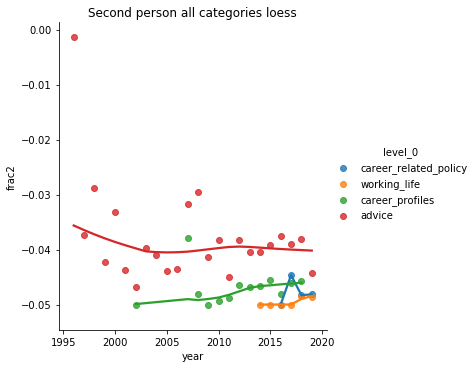

<Figure size 432x288 with 0 Axes>

In [22]:
count=0
pieces=[]

plt.figure(figsize=(12, 8))


for df in dfs:
    # cat_df = full_df[full_df[cat] == "yes"]
    counts_df = clh.pronouns(df)
    counts_df["frac2"] = counts_df["second"]/counts_df["wc"]-exp_second
    
    counts_plot_df = counts_df.groupby("year").median()
    counts_plot_df = counts_plot_df.reset_index()
    pieces.append(counts_plot_df)

    # sns.lmplot(x = "year", y = "frac2",lowess=True, data = counts_plot_df)
    # plt.title("second person "+categories[count])

    count+=1

reg = pd.concat(pieces, keys=['career_related_policy', 'working_life', 'career_profiles','advice'])
reg = reg.reset_index()
# reg
sns.lmplot(x = "year", y = "frac2",lowess=True, hue="level_0", data = reg)
plt.title("Second person all categories loess")
output_plot("../figs/second_person_all_categories")

same thing but for columns

5


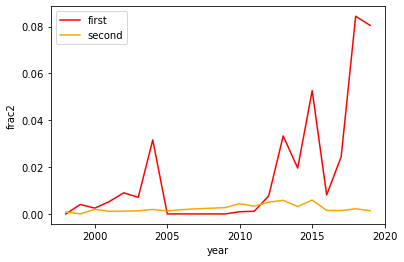

In [24]:
column_df = full_df[full_df.column2=="yes"]
not_column_df = full_df[full_df.column2=="no"]
print(len(column_df[column_df.working_life=="yes"]))

counts_col_df = clh.pronouns(column_df)
counts_not_df = clh.pronouns(not_column_df)


counts_col_df["frac1"] = counts_col_df["first"]/counts_col_df["wc"]
counts_col_df["frac2"] = counts_col_df["second"]/counts_col_df["wc"]
counts_not_df["frac1"] = counts_not_df["first"]/counts_not_df["wc"]
counts_not_df["frac2"] = counts_not_df["second"]/counts_not_df["wc"]

counts_col_plot_df = counts_col_df.groupby("year").median()
counts_not_plot_df = counts_not_df.groupby("year").median()

counts_col_plot_df = counts_col_plot_df.reset_index()
counts_not_plot_df = counts_not_plot_df.reset_index()

# sns.lineplot(x = "year", y = "frac1", color = "green", label="first", ci=None, data=counts_col_plot_df)
# sns.lineplot(x = "year", y = "frac2", color = "blue", label="second", ci=None, data=counts_col_plot_df)
sns.lineplot(x = "year", y = "frac1", color = "red", label="first", data=counts_not_plot_df)
sns.lineplot(x = "year", y = "frac2", color = "orange", label="second", data=counts_not_plot_df)

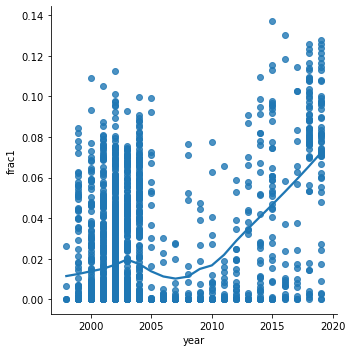

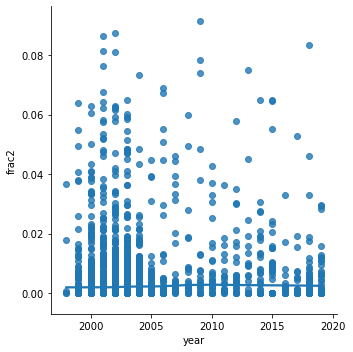

In [25]:

sns.lmplot(x="year", y="inc1",lowess=True, data=counts_not_df)
sns.lmplot(x="year", y="inc2",lowess=True, data=counts_not_df)

# sns.lmplot(x="year", y="frac2",hue="blue",lowess=True, data=counts_not_df)


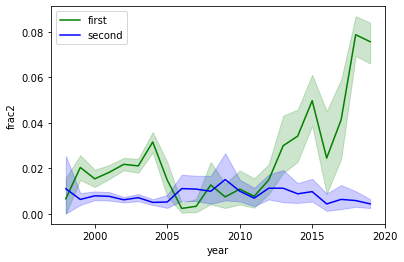

In [27]:
sns.lineplot(x="year", y="frac1",color="green",label="first", data=counts_not_df)
sns.lineplot(x="year", y="frac2",color="blue",label="second", data=counts_not_df)